# Setting up

In [2]:
import random
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import datetime
import pycountry_convert as pc

In [4]:
data = pd.read_csv('customer_information.csv')
data.head(10)

,given_name,surname,gender,birthdate,country_of_birth,current_country,phone_number,postcode,national_insurance_number,bank_account_number,cc_status,weight,height,blood_group,avg_n_drinks_per_week,avg_n_cigret_per_week,education_level,n_countries_visited
0,Lorraine,Reed,F,05/07/1984,Armenia,United Kingdom,(07700) 900876,LS5 8FN,ZZ 19 48 92 T,51157818,0,74.2,1.73,B+,6.5,218.8,phD,48
1,Edward,Williams,M,17/06/1997,Northern Mariana Islands,United Kingdom,(07700) 900 877,M0U 1RA,ZZ 753513 T,103328715,0,69.4,1.74,O-,0.7,43.6,primary,42
2,Hannah,Turner,F,15/06/1990,Venezuela,United Kingdom,+447700 900148,SO1 8HZ,ZZ 947196 T,69342327,0,98.6,1.88,B+,7.8,59.1,bachelor,9
3,Christine,Osborne,F,29/07/2000,Eritrea,United Kingdom,+447700 900112,B18 8LW,ZZ 39 69 47 T,85159170,0,62.0,1.56,O+,4.6,284.2,primary,32
4,Francesca,Yates,F,04/11/1968,Ecuador,United Kingdom,07700 900 413,TQ2 6BE,ZZ 30 98 91 T,11399166,0,96.3,1.81,A-,4.4,348.8,secondary,34
5,Joanne,Middleton,F,15/10/1963,Argentina,United Kingdom,+44(0)7700 900 032,CM7H 0XS,ZZ 141314 T,66208707,0,43.4,1.59,A-,5.7,219.3,other,7
6,Joel,Spencer,M,08/07/1982,Cook Islands,United Kingdom,(07700) 900579,L02 5WL,ZZ 97 20 76 T,108456420,0,77.5,1.55,B+,2.4,79.5,secondary,34
7,Leonard,Marshall,M,20/01/1987,Saint Vincent and the Grenadines,United Kingdom,07700 900508,CR3 5ZN,ZZ 599246 T,126109351,0,59.0,1.89,A+,8.4,48.0,other,24
8,Tracy,Smith,F,07/04/1999,Kiribati,United Kingdom,+447700 900 960,WR96 2TD,ZZ278789T,10754702,0,83.1,1.42,A+,1.2,148.1,secondary,17
9,Gavin,Kay,M,21/12/1998,Belize,United Kingdom,+44(0)7700900206,KT5A 0AW,ZZ 131934 T,52176102,0,80.0,1.74,A+,5.2,47.0,bachelor,47


# Banding birth date to birth year

In [5]:
# Birth years
birthDate = pd.to_datetime(data.birthdate, format='mixed')
data['birth_year'] = pd.DatetimeIndex(birthDate).year
data.head(10)

# finding number of unique values per band
unique_birthdate_counts = data['birth_year'].value_counts()
unique_birthdate_counts
# potential problem: only 5 1955

birth_year
1980    30
1957    28
1961    27
1962    27
1981    27
1983    26
1996    26
1978    26
1998    25
1963    25
1977    25
1994    25
1956    25
1989    25
1968    24
1971    24
1960    24
1997    22
1990    22
1958    21
1988    21
1967    21
1993    20
2002    20
1972    20
1964    20
1976    20
1973    20
1995    20
1986    19
1979    19
2001    19
1959    19
1975    18
1985    18
1987    18
1974    18
1970    18
1982    17
2003    16
2000    16
1992    15
1966    15
1969    15
1999    13
1984    12
1965    12
1991    12
1955     5
Name: count, dtype: int64

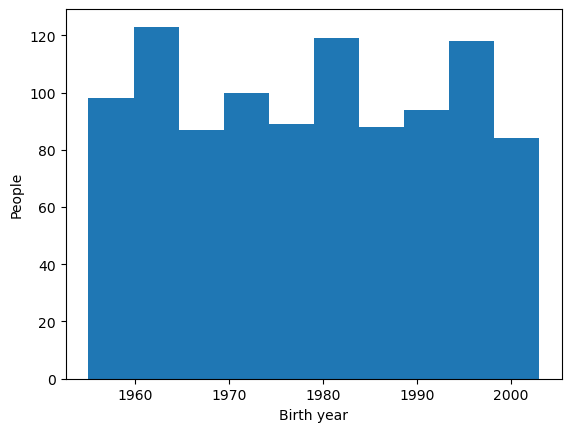

In [6]:
plt.hist(data["birth_year"])
plt.xlabel("Birth year")
plt.ylabel("People")
plt.show()

# Banding country to continent

In [34]:
def country_to_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return 'Unknown'

In [35]:
data['continent_of_birth'] = data['country_of_birth'].apply(country_to_continent)
data.head(10)

# finding the number of unique continent
unique_continent_counts = data['continent_of_birth'].value_counts()
unique_continent_counts
# potential problem: antartica has 3 counts and there are 72 unknowns - need to go through unknowns

continent_of_birth
Europe           213
Africa           208
Asia             189
North America    137
Oceania          112
Unknown           72
South America     66
Antarctica         3
Name: count, dtype: int64

In [36]:
# looking at the unknowns
unknown_continent_rows = data[data['continent_of_birth'] == 'Unknown']

# Select only the 'country_of_birth' and 'continent' columns
unknown_continent_rows = unknown_continent_rows[['country_of_birth', 'continent_of_birth']]

# Display these rows
print(unknown_continent_rows)

# finding the number of unique country of birth for unknowns
unique_country_counts = unknown_continent_rows['country_of_birth'].value_counts()
unique_country_counts

                                      country_of_birth continent_of_birth
14                                               Korea            Unknown
17                               Palestinian Territory            Unknown
18                                    Saint Barthelemy            Unknown
21                                        Saint Helena            Unknown
22                                               Korea            Unknown
..                                                 ...                ...
910  British Indian Ocean Territory (Chagos Archipe...            Unknown
915               United States Minor Outlying Islands            Unknown
933       Antarctica (the territory South of 60 deg S)            Unknown
950                                            Reunion            Unknown
966                                              Korea            Unknown

[72 rows x 2 columns]


country_of_birth
Korea                                                  12
Western Sahara                                          6
Slovakia (Slovak Republic)                              6
Saint Barthelemy                                        5
Pitcairn Islands                                        5
Holy See (Vatican City State)                           5
Reunion                                                 4
United States Minor Outlying Islands                    4
Antarctica (the territory South of 60 deg S)            4
Svalbard & Jan Mayen Islands                            4
Bouvet Island (Bouvetoya)                               4
Saint Helena                                            3
Cote d'Ivoire                                           3
British Indian Ocean Territory (Chagos Archipelago)     2
Palestinian Territory                                   2
Libyan Arab Jamahiriya                                  1
Timor-Leste                                            

# removing signs on blood

In [39]:
# Remove the '+' and '-' signs from the 'blood_group' column
data['blood_groupanon'] = data['blood_group'].str.replace('+', '').str.replace('-', '')
data.head(10)

# checking number of unique values
unique_blood_group = data['blood_groupanon'].value_counts()
unique_blood_group

blood_groupanon
A     431
O     430
B     108
AB     31
Name: count, dtype: int64